# Kevin Martin CIS600 - Sunday @ 9:00pm EST

HW4: ANN Comparison

**HW4 note:** I will be building direclty off of my HW3 submission, and adding in some additional work based on the comments. Sections 1-4 will remain the same, section 5 will be an abridged EDA section with a different method of handling outliers, adding scaling to the data, and more neighbor testing for the K-NN algorithm.

I will use all the same algorithms as HW3, but with these updated preprocessing steps. Then, I will compare and take the best ones for my final table/prediction.

Section 6 will be the new algorithms for HW4, the artificial neural networks. I will follow a similar style and try to evaluate different scenarios. 

Section 7 will be the Prediction, where I apply the trained models on the test dataset and generate my CSV file for submission.

Finally, Section 8 will be an expanded conclusion, with a discussion of the results from the previous steps and summarized in tabular form.



**Outline:**
1. [Business Objectives](#Businessobjectives)
2. [Data Understanding](#Dataunderstanding)
3. [Data Preparation](#Datapreparation)
4. [Model Training/Testing](#Modeltrain)
5. [HW4 Update - Expanded EDA](#HW3update)
6. [HW4 Models: ANN](#HW4)
7. [Prediction](#Prediction)
8. [Conclusion](#Conclusion)

# 1. Business Objectives <a class="anchor" id="Businessunderstanding"></a>
In this excersie, I will emply several different classification algorithms in an effort to determine which one is the most accurate at predicting whether or not a patient has a specific disease. 

This is a binary classification problem and the algorithms I will be employing are Naive Bayes, K Nearest Neighbor, Random Forest, and Gradient Boosting Classifier. I will also tune the hyper-parameters of each, and then discuss the pros and cons of each before weighing in on the optimal choice

## 1.1 Preliminary Assessment<a class="anchor" id="Assessthecurrentsituation"></a>

The data is broken out into two sets, a training set and a testing set. I will be training the four algorithms solely on the training set and then applying the trained model to 100% of the testing set. At a high level, the datasets appear to be in excellent order and very condusive to this type of classification training.

 ## 1.2 Desired Outputs <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Develop a relatively high accuracy prediction as to whether or not a patient has the disease
- Identify key attributes that contribute to these predicitions



**Data mining success criteria**
- Clean and prepare the data so no false conclusions are reached (avoiding the "garbage-in-garbage-out" paradigm)
- Avoid erroneous patterns and bring errors down to an acceptable level

 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- Our ultimate goal is to predict whether or not a patient does or does not have the diesase.

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Data provided by professor, in a formatted CSV file. As the data has been purposely setup for the assignment, no issues noted with the initial acquisition. 

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
from numpy import nan
from scipy import stats
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut

In [2]:
#Data source: 
#Source Query location: 
test_data = '/home/kebin/Syracuse/CIS600_All/HW3/DiseasePredictionTesting.csv'
train_data = '/home/kebin/Syracuse/CIS600_All/HW3/DiseasePredictionTraining.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df_test =  pd.read_csv(test_data, sep=',') 
df_train =  pd.read_csv(train_data, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
The data has 12 columns and plenty of individual to train the models. Note that the Training Data set has the extra column of "Disease" which is of course the binary target feature. The Testing Data set is (correctly) omitting this column, but also has a column at the start "ID" which is just an individual record identifier. I will add the same to the training set, thus it will have one extra column.

For brevity, I will present the generic metrics on just the training data.

In [3]:
#This will validate our initial observation of the amount of unique records as well as attributes/column
print('Test data:')
print(df_test.shape)
print('Training data:')
print(df_train.shape)

Test data:
(21000, 12)
Training data:
(49000, 12)


In [4]:
print('Test data:')
print(df_test.describe())

Test data:
                 ID           Age        Height        Weight  \
count  21000.000000  21000.000000  21000.000000  21000.000000   
mean   10499.500000     52.811190    164.341381     74.241070   
std     6062.322162      6.775489      8.195082     14.548468   
min        0.000000     29.000000     64.000000     21.000000   
25%     5249.750000     48.000000    159.000000     65.000000   
50%    10499.500000     53.000000    165.000000     72.000000   
75%    15749.250000     58.000000    170.000000     82.000000   
max    20999.000000     64.000000    250.000000    183.000000   

       High Blood Pressure  Low Blood Pressure         Smoke       Alcohol  \
count         21000.000000        21000.000000  21000.000000  21000.000000   
mean            129.093429           95.960857      0.087810      0.052667   
std             167.975674          157.257409      0.283024      0.223372   
min              10.000000          -70.000000      0.000000      0.000000   
25%          

In [5]:
# We can now look a little more closely at the columns and see the data types as well as potential missing data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  49000 non-null  int64  
 1   Gender               49000 non-null  object 
 2   Height               49000 non-null  int64  
 3   Weight               49000 non-null  float64
 4   High Blood Pressure  49000 non-null  int64  
 5   Low Blood Pressure   49000 non-null  int64  
 6   Cholesterol          49000 non-null  object 
 7   Glucose              49000 non-null  object 
 8   Smoke                49000 non-null  int64  
 9   Alcohol              49000 non-null  int64  
 10  Exercise             49000 non-null  int64  
 11  Disease              49000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 4.5+ MB
None


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The data was extremely complete. Using the below  code, we can see that **none** columns have missing data. Also, no column had over 50% data missing. This is consistent between both the training and testing data. Thus, none of the columns needed to be removed.

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("\nThe selections has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df_test))
print(missing_values_table(df_train))


The selections has 12 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

The selections has 12 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [7]:
# Get the columns with > 50% missing
missing_train = missing_values_table(df_train);
miss_col_train = list(missing_train[missing_train['% of Total Values'] > 50].index)
print('There are %d columns missing more than half the data.' % len(miss_col_train))
missing_test = missing_values_table(df_test);
miss_col_test = list(missing_test[missing_test['% of Total Values'] > 50].index)
print('\nThere are %d columns missing more than half the data.' % len(miss_col_test))


The selections has 12 columns.
There are 0 columns that have missing values.
There are 0 columns missing more than half the data.

The selections has 12 columns.
There are 0 columns that have missing values.

There are 0 columns missing more than half the data.


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
To address outliers, we will look at the five fields that are numeric and non-binary. By quickly inspecting them visually, we can see where potential issues might arise. Visually, there are outliers present within each attribute's data. I will use a mild buffer of 35% on the high and low ends of the quartile ranges, and exclude everything falling outside of that boundary. First, the unmodified data:

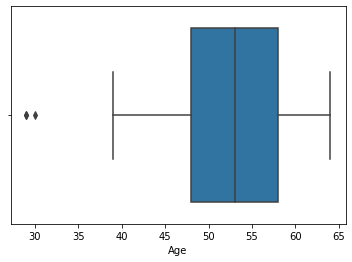

In [8]:
# Temp (train) outliers check
frame_train = pd.DataFrame(df_train)
sns.boxplot(x=frame_train['Age'])
plt.show()

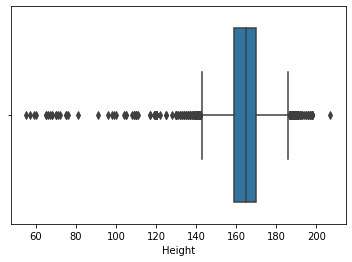

In [9]:
sns.boxplot(x=frame_train['Height'])
plt.show()

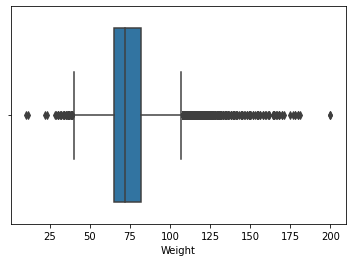

In [10]:
sns.boxplot(x=frame_train['Weight'])
plt.show()

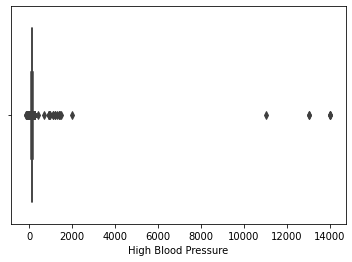

In [11]:
sns.boxplot(x=frame_train['High Blood Pressure'])
plt.show()

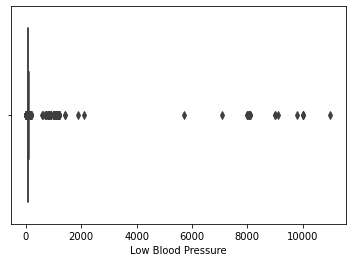

In [12]:
sns.boxplot(x=frame_train['Low Blood Pressure'])
plt.show()

Next, I will apply the buffer and remove the outliers:

In [13]:
num_cols = ['Age', 'Height', 'Weight', 'High Blood Pressure', 'Low Blood Pressure']
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
df2 = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Original shape: ', df_train.shape)
print('Updated shape: ', df2.shape)

Original shape:  (49000, 12)
Updated shape:  (31002, 12)


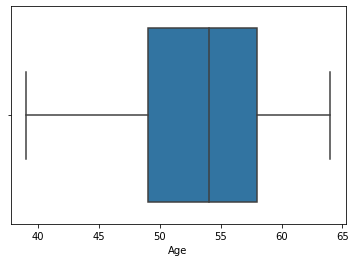

In [14]:
frame_new = pd.DataFrame(df2)
sns.boxplot(x=frame_new['Age'])
plt.show()

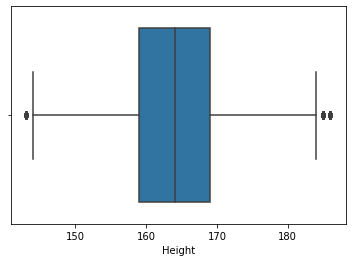

In [15]:
sns.boxplot(x=frame_new['Height'])
plt.show()

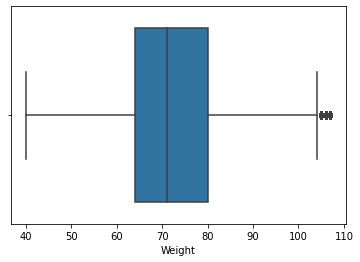

In [16]:
sns.boxplot(x=frame_new['Weight'])
plt.show()

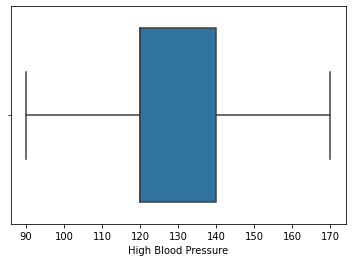

In [17]:
sns.boxplot(x=frame_new['High Blood Pressure'])
plt.show()

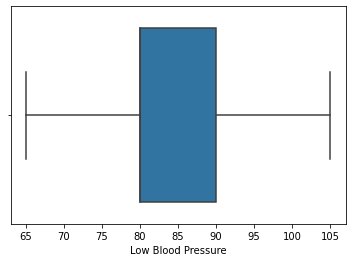

In [18]:
sns.boxplot(x=frame_new['Low Blood Pressure'])
plt.show()

While we have lost a significant amount of records, we have substantially cleaned up the dataset. Because this is just the training set, we can now tune the algorithms on much better inputs. 

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
For a quick visual look at our key attribute of Disease, consider a simple histogram. It is almost a perfect 50/50 distribution for those patients that have the disease as compared to those that do not. We will remember this balanced data when we do our final prediction and evaluation.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

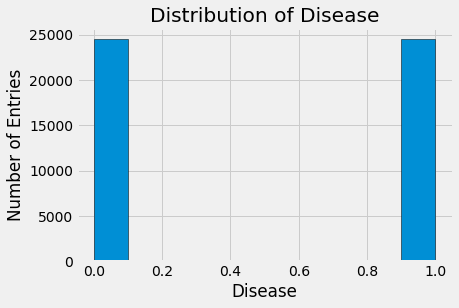

In [19]:
# Histogram
#df2 = pd.DataFrame(df_train)
#df2['RainTomorrow'] = df2['RainTomorrow'].astype('category').cat.codes
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);
        plt.show()

        
hist_chart(df_train, 'Disease')

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
To get a general sense of corrleations, a heatmap across all vairables as compared to all others was generated. Clearly, there are some moderatey correlated attributes, but to the point of attrition, a more focused list of correlations was generated. Here, we can see the more relevant relationships and begin to map out where the focus of the analysis will be directed. 

<Figure size 1440x1440 with 0 Axes>

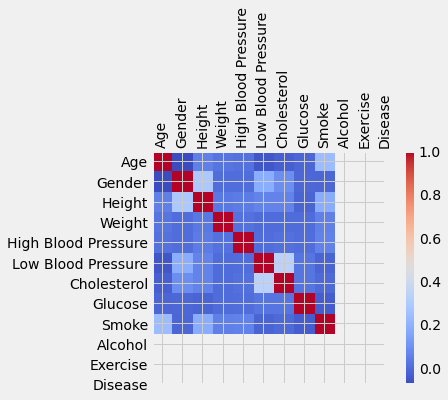

In [20]:
fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
corr = df_train.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0, len(df_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_train.columns)
ax.set_yticklabels(df_train.columns)
plt.show()


In [21]:
#df2 = pd.DataFrame(df_train)
#df2['RainTomorrow'] = df2['RainTomorrow'].astype('category').cat.codes
corr_data = df_train[df_train.columns[1:]].corr()['Disease'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

Exercise              -0.035202
Smoke                 -0.014579
Height                -0.011022
Alcohol               -0.004486
High Blood Pressure    0.053667
Low Blood Pressure     0.060944
Weight                 0.181836
Disease                1.000000
Name: Disease, dtype: float64


In [22]:
corr_data = df2[df2.columns[1:]].corr()['Disease'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

Height                -0.030694
Weight                 0.161195
Low Blood Pressure     0.346688
High Blood Pressure    0.447522
Disease                1.000000
Smoke                       NaN
Alcohol                     NaN
Exercise                    NaN
Name: Disease, dtype: float64


# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.1 Data Selection <a class="anchor" id="Selectyourdata"></a>
With regards to the training data set, the data is in excellent order. I will not be making any modifications as the data has no duplicates or missing values, as shown below.

### 3.1.1 Altering Data Types and Dealing with Zeros <a class="anchor" id="AlteringDatatypes"></a>
Fortunately the data is pretty much all in a usable format. I will be adding a boolean column later just as a target column, but that will not require any alterations to the original data set.

While there are some zeros, they appear to be in columns that are relevant (as in 0% humidity for the day). As such, I will leave them with the assumption that they were recorded correctly, especially considering the amount of missing data points (discussed later).

### 3.1.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>

In [23]:
print('Original shape of data')
print(df_train.shape)
print('Shape after removing duplicates')
df_train.drop_duplicates(keep='first')
print(df_train.shape)

Original shape of data
(49000, 12)
Shape after removing duplicates
(49000, 12)


Note that the shape remains the same after trying to remove duplicates. Thus no duplicate records exist.

## 3.1.3 Missing Values

Similarly, the data does not present any missing values, so no records need to be dropped or ignored.

In [24]:
print(df_train.shape)
#df_train2 = df_train.replace(0, nan)
df_train2 = df_train
df_train2.dropna(inplace=True)
print(df_train2.shape)

(49000, 12)
(49000, 12)


## 3.2.4 Altering Data
Three are categorical in nature, so I will be converting them to integers and including them in the test/training.

In [25]:
df2['Gender'] = df2['Gender'].astype('category').cat.codes
df2['Cholesterol'] = df2['Cholesterol'].astype('category').cat.codes
df2['Glucose'] = df2['Glucose'].astype('category').cat.codes
df2.dtypes

Age                      int64
Gender                    int8
Height                   int64
Weight                 float64
High Blood Pressure      int64
Low Blood Pressure       int64
Cholesterol               int8
Glucose                   int8
Smoke                    int64
Alcohol                  int64
Exercise                 int64
Disease                  int64
dtype: object

# 4. Model Training/Testing<a class="anchor" id="Modeltrain"></a>

Regarding evaluation, I will look at accuracy, precision, and recall with the objective to enhance each one as best as possible without causing a detriment to any of the other metrics.

Across the different models, I will use the same train/test split on the training dataset and evaluate the results all once. This will not only keep the results consistent, but also any tuning/adjustments to the hyperparameters will also be kept conssitent.

First I will run a copule of different scenarios to get a baseline, then I will use the best of each one and due some more model-specific tuning. Here I've created a function called "evaluate" which will let me loop through a couple of different scenarios for each algorithm before digging into the specifics of each.

In [26]:
final_vars = ['Age', 'Height', 'Weight', 'High Blood Pressure', 'Low Blood Pressure', 'Smoke', 'Alcohol', 'Exercise']
x = df2[final_vars]
y = df2.Disease

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)   

def evaluate(model, graph_flag):
    out_mod = model.fit(x_train, y_train)
    y_pred_mod = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred_mod)
    print ("Confusion Matrix : \n", cm)
    print ("Accuracy : ", accuracy_score(y_test, y_pred_mod)) 
    print("Precision:",metrics.precision_score(y_test, y_pred_mod))
    print("Recall:",metrics.recall_score(y_test, y_pred_mod))
    if graph_flag == 1:
        sns.heatmap(cm)
    return out_mod

## 4.1 Naive Bayes 

I will be using the Guassian Naive Bayes as (most of) the inputs are continuous. The exception are the three categorical attributes have were transformed into "continuous" integers in step 3.2.4.

Also, I will consider this approach the base case and not subject to manipulating the hyper parameters:

Confusion Matrix : 
 [[2673  528]
 [1277 1723]]
Accuracy :  0.7089179164650863
Precision: 0.7654375832963127
Recall: 0.5743333333333334
CPU times: user 47.1 ms, sys: 19.9 ms, total: 67 ms
Wall time: 41.9 ms


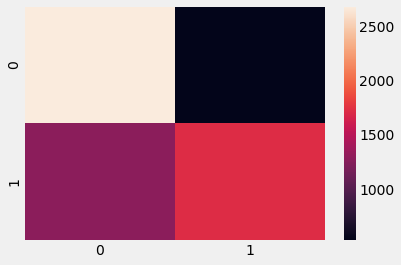

In [28]:
%%time
# set up naive bayes classification (using a Gaussian classifier)
gnb = GaussianNB()
gnb_train = evaluate(gnb, 1)

## 4.2 K-Nearest Neighbors

For the K-Nearest Neighbors approach, I will be focusing on the different numbers of neighbors. Because no optimal number for k exists, several common ones have been chosen. It's worth nothing that, while close on the number line, the differnce between 3 neighbors and 7 neighbors is quite large, so I expect some discernable improvement between choices.

In [29]:
%%time
# K Nearest Neighbors classifier with five different neighbors
neighbor_try = [3, 4, 5, 6, 7]
for neighbor in neighbor_try:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn_train = evaluate(knn, 0)

Confusion Matrix : 
 [[2176 1025]
 [1068 1932]]
Accuracy :  0.6624737945492662
Precision: 0.6533648968549205
Recall: 0.644
Confusion Matrix : 
 [[2571  630]
 [1390 1610]]
Accuracy :  0.674246089340429
Precision: 0.71875
Recall: 0.5366666666666666
Confusion Matrix : 
 [[2290  911]
 [1020 1980]]
Accuracy :  0.6885986131269151
Precision: 0.6848841231407817
Recall: 0.66
Confusion Matrix : 
 [[2565  636]
 [1254 1746]]
Accuracy :  0.6952104499274311
Precision: 0.7329974811083123
Recall: 0.582
Confusion Matrix : 
 [[2346  855]
 [1017 1983]]
Accuracy :  0.6981132075471698
Precision: 0.6987315010570825
Recall: 0.661
CPU times: user 1.52 s, sys: 53.4 ms, total: 1.57 s
Wall time: 1.48 s


Using not only accuracy, but also precision and recall, we can make the best choice for k. Accuracy is going to be the most important factor, but it must be supported by the other metrics as well. Here we can see that as we increased k, we generally yielded better results. With k equal to 7, we have not only the highest accuracy, but also a strong precision and recall metric. Note that while the prcesion is slightly worse than when k was set to 6, the recall is higher and thus 7 is the better choice.

## 4.3 Random Forest

The random forest approach will be similar to that of KNN, but with more parameters to test. Now, given the multiple inputs, a grid search will be helpful to optimize the algorithm. I will use a grid search evaluted with cross-validation (through scikit learn) to test multiple hyper parameters and show the best one.

**NOTE**

This approach is much more computationally intesive. On a brand new, mid-level Ryzen 3600 CPU, this approach took over five minutes of ~99% CPU usage to calculate. Had I employed additional hardware, such as a GPU with CUDA support (i.e., NVIDIA's GTX/RTX cards), this time would have been substantially reduced. This was not an option for me at this time unfortunately.

In [32]:
%%time
#rf = RandomForestClassifier()
# Random Forest with estimators
rf_param = { 'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_search = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf_out = evaluate(rf_search, 0)


#estimator_list = [25, 75, 100, 125, 150]
#for estimator in estimator_list:
#    rf = RandomForestClassifier()
#    rf_train = evaluate(rf, 0)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.0min


KeyboardInterrupt: 

In [ ]:
rf_out.best_params_

In [ ]:
# The results of the best model
%%time
rf = RandomForestClassifier(bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10,n_estimators=300)
rf_train = evaluate(rf, 1)

Here we neatly see the results of grid search. Also note that the accuracy is the highest of any approach so far. This is a more sophisticated algorithm with well optimized parameters.

## 4.4 Gradient Boosting Machine

Finally, the Gradient Boosting Machine, which uses the "ensemble" approach by employing multiple weak predictive models. As such, they benefit from multiple different observations, and allow onlyt he most useful observations to be improved upon. This leads to a larer amount of hyper parameters to test.

Given this, it leads to a very flexible and customizable approach. However, due to hardware limitations, I won't be running quite as extensive of a grid search as I would like. Instead, I will test a few parameters for my model, but I will show the other "tests" that I would want to run in parallel to truly optimize my model.

In testing various hyper parameters for the other algorithms, and in doing some preliminary testing here, I am noticing very small incremental gains. So while ideally I would like to vet a multitude of inputs, the results are not yielding much improvement.

Finally, I will emply another python package for gradient boosting: XGBoost. This model comes predefined and supposed to be a more "extreme" version. I will use it side-by-side my tuned model to see if the results are any better.

In [ ]:
# various tests to try
%%time
p_test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
p_test2 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}
p_test3 = {'max_features':[2,3,4,5,6,7]}
p_test4= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

In [ ]:
%%time
gb_best = GradientBoostingClassifier(n_estimators=1250, learning_rate=.01, max_features='sqrt', max_depth=4, random_state=10)
gb_train = evaluate(gb_best, 0)

In [ ]:
%%time
xgb = XGBClassifier()
xgb_train = evaluate(xgb, 1)

I only tested the parameters in p_test1, which are generally considered the most importnat/meaningful parameters for gradient boosting (learning rate and number of estimators). Even without continuing to test max features, sample splits, etc., this model was stable to outperform the pre-tuned XGBoost. 

# 5. HW4 Update <a class="anchor" id="HW3update"></a>

To expand on my previous EDA, I will start a new dataframe copy. For outliers, I will only remove a couple by hand this time in an effort to preserve more of the data. Using the graphs from section 2.3.2, I will make manual cutoffs to the data. Clearly the two blood measures have some serious outliers. However, the rest of the data does make actual sense for a range of humans, assuming perhaps children/infants were included (due to the small weights). As such, I will leave the rest of the data untouched.

Next, for my training data, I will employ a scaler to allow for more uniform data. Then, I will generate the same models as section 4, but using these two updates.

Finally, for the KNN algorithm, I will test more than the orginal set of neighbors to see if I missed anything the first time around.

In [28]:
# new df setup
df_hw4 =  pd.read_csv(train_data, sep=',') 
df_hw4['Gender'] = df_hw4['Gender'].astype('category').cat.codes
df_hw4['Cholesterol'] = df_hw4['Cholesterol'].astype('category').cat.codes
df_hw4['Glucose'] = df_hw4['Glucose'].astype('category').cat.codes
df_hw4.dtypes

Age                      int64
Gender                    int8
Height                   int64
Weight                 float64
High Blood Pressure      int64
Low Blood Pressure       int64
Cholesterol               int8
Glucose                   int8
Smoke                    int64
Alcohol                  int64
Exercise                 int64
Disease                  int64
dtype: object

In [42]:
# drop blood pressures less than 30 or greater than 300, clear outliers
drop_low = df_hw4[df_hw4['Low Blood Pressure'] > 200].index
df_hw4.drop(drop_low, inplace = True)
drop_low2 = df_hw4[df_hw4['Low Blood Pressure'] < 30].index
df_hw4.drop(drop_low2, inplace = True)
drop_high = df_hw4[df_hw4['High Blood Pressure'] > 200].index
df_hw4.drop(drop_high, inplace = True)
drop_high2 = df_hw4[df_hw4['High Blood Pressure'] < 30].index
df_hw4.drop(drop_high2, inplace = True)

In [43]:
# function for testing models, this time with scaling
# the '4' suffix denotes that it was added for HW4
final_vars4 = ['Age', 'Height', 'Weight', 'High Blood Pressure', 'Low Blood Pressure', 'Smoke', 'Alcohol', 'Exercise']
x4 = df_hw4[final_vars4]
y4 = df_hw4.Disease

x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.2, random_state=16)

scaler = StandardScaler().fit(x_train4)
x_train4 = scaler.transform(x_train4)
x_test4 = scaler.transform(x_test4)

def evaluate4(model, graph_flag):
    out_mod = model.fit(x_train4, y_train4)
    y_pred_mod = model.predict(x_test4)
    cm = confusion_matrix(y_test4, y_pred_mod)
    print ("Confusion Matrix : \n", cm)
    print ("Accuracy : ", accuracy_score(y_test4, y_pred_mod)) 
    print("Precision:",metrics.precision_score(y_test4, y_pred_mod))
    print("Recall:",metrics.recall_score(y_test4, y_pred_mod))
    if graph_flag == 1:
        sns.heatmap(cm)
    # return out_mod
    return y_pred_mod, out_mod

In [44]:
%%time
gnb4 = GaussianNB()
gnb_train4, gnb_mod = evaluate4(gnb4, 0)

Confusion Matrix : 
 [[4021  818]
 [1937 2848]]
Accuracy :  0.7137364921030757
Precision: 0.7768685215493726
Recall: 0.5951933124346918
CPU times: user 16.8 ms, sys: 0 ns, total: 16.8 ms
Wall time: 15.7 ms


In [45]:
%%time
best_knn = 0
best_score = 0
neighbor_try4 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for neighbor in neighbor_try4:
    print('Results with ', neighbor, ' neighbors')
    knn4 = KNeighborsClassifier(n_neighbors=neighbor)
    knn_train4, knn_mod = evaluate4(knn4, 0)
    tmp = knn_mod.fit(x_train4, y_train4)
    tmp = tmp.predict(x_test4)
    score = accuracy_score(y_test4, tmp)
    if score > best_score:
        best_score = score
        best_knn = neighbor
    print('Highest accuracy was ', best_score, ' with neighbors: ', best_knn)

Results with  1  neighbors
Confusion Matrix : 
 [[3106 1733]
 [1759 3026]]
Accuracy :  0.6371571072319202
Precision: 0.6358478671989913
Recall: 0.63239289446186
Highest accuracy was  0.6371571072319202  with neighbors:  1
Results with  2  neighbors
Confusion Matrix : 
 [[4005  834]
 [2643 2142]]
Accuracy :  0.638715710723192
Precision: 0.719758064516129
Recall: 0.44764890282131664
Highest accuracy was  0.638715710723192  with neighbors:  2
Results with  3  neighbors
Confusion Matrix : 
 [[3308 1531]
 [1613 3172]]
Accuracy :  0.6733167082294265
Precision: 0.6744631086540506
Recall: 0.6629049111807732
Highest accuracy was  0.6733167082294265  with neighbors:  3
Results with  4  neighbors
Confusion Matrix : 
 [[3853  986]
 [2148 2637]]
Accuracy :  0.6743557772236076
Precision: 0.727849848192106
Recall: 0.5510971786833856
Highest accuracy was  0.6743557772236076  with neighbors:  4
Results with  5  neighbors
Confusion Matrix : 
 [[3401 1438]
 [1567 3218]]
Accuracy :  0.6877597672485453
Pre

Regarding the amount of neighbors to examine, I initially started with 5 for HW3. I added 2 more to test the full range 1-7. I assumed that the ideal would be a low number, such as 3 or 4. However, I noted that I got better performance as I added more. So I went up to 10, then 15, and finally 20. As we can see, 16 was the ideal number, which is much higher than I initially thought.

In [46]:
knn_final = KNeighborsClassifier(n_neighbors=16)
knn_train_final, knn_mod = evaluate4(knn_final, 0)

Confusion Matrix : 
 [[3751 1088]
 [1670 3115]]
Accuracy :  0.7134247714048213
Precision: 0.7411372828931715
Recall: 0.6509926854754441


In [47]:
%%time
rf4 = RandomForestClassifier(bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10,n_estimators=300)
rf_train4, rf_mod = evaluate4(rf4, 0)

Confusion Matrix : 
 [[3730 1109]
 [1541 3244]]
Accuracy :  0.7246467165419784
Precision: 0.7452331725246956
Recall: 0.6779519331243469
CPU times: user 5.55 s, sys: 0 ns, total: 5.55 s
Wall time: 5.55 s


In [48]:
%%time
xgb4 = XGBClassifier()
xgb_train4, xgb_mod = evaluate4(xgb4, 0)

Confusion Matrix : 
 [[3715 1124]
 [1570 3215]]
Accuracy :  0.720074812967581
Precision: 0.7409541368979028
Recall: 0.6718913270637409
CPU times: user 5.47 s, sys: 0 ns, total: 5.47 s
Wall time: 476 ms


# 6. HW4 Models<a class="anchor" id="H4"></a>

## 6.1 Decision Tree
As a baseline against the nerual networks, I will implement a decision tree algorithm. The goal will be to strike a balance for a tree that has appropriate depth and complexity without overfitting to the data.

First I will show the results of the baseline decision tree. Next, I will use a grid search to try to find the optimal parameters and achieve (hopefully) improved accuracy. Note that I actually used a grid search on a decision tree for the second homework assignment, so I will be using most of the same code. Finally, we can examine the difference in tuning.

In [49]:
dec_tree = tree.DecisionTreeClassifier()
dec_train = evaluate4(dec_tree, 0)

Confusion Matrix : 
 [[3172 1667]
 [1922 2863]]
Accuracy :  0.6270781379883624
Precision: 0.6320088300220751
Recall: 0.5983281086729363


In [ ]:

%%time
#Set up the grid search for a decision tree approach

sc = StandardScaler()
pca = decomposition.PCA()
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline for the tree
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

#Set the parameters to test
n_components = list(range(1,x4.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,12]
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

#Check best parameters
clf_G = GridSearchCV(pipe, parameters)
#Include the same dataset from the HW4 driver function
clf_G.fit(x4, y4)

#View The Best Parameters
print('Best Criterion:', clf_G.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf_G.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf_G.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_G.best_estimator_.get_params()['decisiontree'])

#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf_G, x4, y4, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


In [50]:
# decision tree with the optimal hyper parameters
grid_tree = DecisionTreeClassifier(criterion="gini", max_depth=6)
grid_tree_train, grid_mod = evaluate4(grid_tree,0)

Confusion Matrix : 
 [[3844  995]
 [1714 3071]]
Accuracy :  0.7185162094763092
Precision: 0.7552877520905067
Recall: 0.6417972831765936


By using cross training to evaluate the grid search, we can see the optimal parameters were using gini as the criterion and a maximum depth of 6. Indeed, the results support this as we are seeing better results in all three metrics, with accuracy improving almost 9%. For the summary and comparision, I will be using the more successful optimized decision tree model. 

## 6.2 Artificial Neural Networks (ANN)
To test the ANN, I am going to try a few things. First, I will be using the scikit-learn multi-layer processing (MLP) neural network. As with all the scikit-learn modules, it allows for some tuning of the hyper parameters. So I will first run them with 0, 1, and 2 hidden layers as recommended. These will be my baseline checks.

While quick and effective, the "neural network" provided by sci-kit learn seems sort of lackluster. If the networks are doing what they say, then they are incredibly efficient. A two layer neurla network is taking around 3 seconds to train? It just doesn't sound right. However, the accuracies/metrics shown do make sense, so I will assume them to be correct.

In an effort to test further, I am also going to employ the nerual network package from keras. There are more hyperparameters to set up, and the models take far, far longer to train: in the case of my mid-range CPU, 11 minutes. 

Given the great disparity in time, I sort of assume that the keras models are doing the correct training using backpropagation. Also, the accuracies reported are just terrible until at least two hidden layers. This makes more sense as well, as a network with zero hidden layers should not perform well at all.

Because it is so computationally expensive to test the different networks, I am going to use the results from the scikit-learn MLP networks for my final results. But I am glad I tested out the keras aproach and feel more comfortable with how it is training.

Finally, I am going to add a fourth keras model with four hidden layers, just to see if the results improve. Regardless, I will not be including it in my CSV output file.

In [39]:
%%time
n = len(final_vars4)
mlp0 = MLPClassifier(hidden_layer_sizes=(), activation='relu', solver='adam',max_iter=250)
mlp_train0, mlp_mod0 = evaluate4(mlp0,0)

Confusion Matrix : 
 [[3762 1077]
 [1599 3186]]
Accuracy :  0.7219451371571073
Precision: 0.7473610133708656
Recall: 0.6658307210031348
CPU times: user 658 ms, sys: 174 ms, total: 833 ms
Wall time: 659 ms


In [37]:
%%time
mlp1 = MLPClassifier(hidden_layer_sizes=(n), activation='relu', solver='adam',max_iter=250)
mlp_train1, mlp_mod1 = evaluate4(mlp1,0)

Confusion Matrix : 
 [[3712 1127]
 [1516 3269]]
Accuracy :  0.7253740648379052
Precision: 0.7436305732484076
Recall: 0.6831765935214211
CPU times: user 3.26 s, sys: 632 ms, total: 3.89 s
Wall time: 3.16 s


In [38]:
%%time
mlp2 = MLPClassifier(hidden_layer_sizes=(n, n), activation='relu', solver='adam',max_iter=250)
mlp_train2, mlp_mod2 = evaluate4(mlp2,0)

Confusion Matrix : 
 [[3678 1161]
 [1486 3299]]
Accuracy :  0.7249584372402328
Precision: 0.7396860986547085
Recall: 0.6894461859979102
CPU times: user 3.25 s, sys: 624 ms, total: 3.88 s
Wall time: 3.12 s


We see relatively similar results for all three approaches, which is rather dissapointing. 

Moving into the keras models, note the extreme time differences in training.

In [134]:
%%time
%%capture
# 0 hidden layers
ann0 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
])

ann0.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann0.fit(x_train4, y_train4, epochs=50, batch_size=1)

CPU times: user 11min 27s, sys: 37.9 s, total: 12min 5s
Wall time: 8min 47s


In [133]:
test_loss0, test_acc0 = ann0.evaluate(x_test4, y_test4)
print('Test accuracy:', test_acc0)

301/301 [==============================] - 0s 325us/step - loss: 4.9301 - accuracy: 0.1497
Test accuracy: 0.14972984790802002


In [31]:
%%time
%%capture
# 1 hidden layers
ann1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
])

ann1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann1.fit(x_train4, y_train4, epochs=50, batch_size=1)

CPU times: user 13min 42s, sys: 43.9 s, total: 14min 25s
Wall time: 9min 58s


In [32]:
test_loss1, test_acc1 = ann1.evaluate(x_test4, y_test4)
print('Test accuracy:', test_acc1)

301/301 [==============================] - 0s 330us/step - loss: 0.8730 - accuracy: 0.1092
Test accuracy: 0.10920615494251251


In [33]:
%%time
%%capture
# 2 hidden layers
ann2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

ann2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann2.fit(x_train4, y_train4, epochs=50, batch_size=1)

CPU times: user 13min 45s, sys: 42.9 s, total: 14min 28s
Wall time: 10min 3s


In [34]:
test_loss2, test_acc2 = ann2.evaluate(x_test4, y_test4)
print('Test accuracy:', test_acc2)

301/301 [==============================] - 0s 302us/step - loss: 0.5559 - accuracy: 0.7237
Test accuracy: 0.7237115502357483


In [40]:
%%time
%%capture
# 2 hidden layers
ann4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

ann4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann4.fit(x_train4, y_train4, epochs=50, batch_size=1)

CPU times: user 16min 21s, sys: 59.5 s, total: 17min 20s
Wall time: 11min 4s


In [41]:
test_loss4, test_acc4 = ann4.evaluate(x_test4, y_test4)
print('Test accuracy:', test_acc4)

301/301 [==============================] - 0s 340us/step - loss: 0.5663 - accuracy: 0.7231
Test accuracy: 0.7230880856513977


The disparity between a zero layer network and the two layer network is quite vast, and shows the benefits of adding these layers. Had the computation time been more managable, I would like to have tested even more parameters. But I believe the results are sufficient as is.

The four layer network provides dissapointing results as well. I suspect that more management of the different layers would provide better results.

# 7 Prediction <a class="anchor" id="Prediction"></a>
With our optimized decision tree, I will rerun the algorithm only this time I will train on 100% of the training data and apply the results to the testing data. To show the results, I will add the requested new column "DT" that will display the results of my model.

To address the large amounts of missing data from the test set, I do not want to simply delete these rows. With the training data, I still had plenty of rows leftover to test on and derive an accurate model. But for predictive purposes, I do not wish to ignore over half of the data.

Instead, I will fill out the missing values with the mean for each respective column. As seen in the training data set comparisons, this approach makes sense.

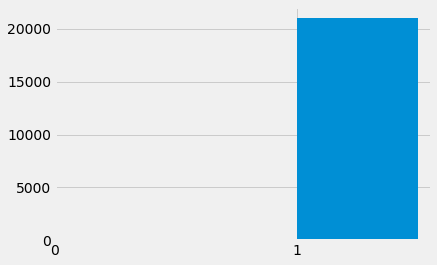

In [51]:
#Add one dummy row to allow for 100% test split
dummy_row = df_test.iloc[[0]]
df_test = df_test.append(dummy_row)

df_test['DT'] = 0
df_test['ANN0'] = 0
df_test['ANN1'] = 0
df_test['ANN2'] = 0
X2 = df_test[final_vars4]
y_dt = df_test.DT
y_ann0 = df_test.ANN0
y_ann1 = df_test.ANN1
y_ann2 = df_test.ANN2

#Allow testing data to be 100%
X_train2, X_test_dt, y_train2, y_test2 = train_test_split(X2, y_dt, test_size=21000, random_state=61)
X_train2, X_test_ann0, y_train2, y_test2 = train_test_split(X2, y_ann0, test_size=21000, random_state=61)
X_train2, X_test_ann1, y_train2, y_test2 = train_test_split(X2, y_ann1, test_size=21000, random_state=61)
X_train2, X_test_ann2, y_train2, y_test2 = train_test_split(X2, y_ann2, test_size=21000, random_state=61)

y_pred_dt = grid_mod.predict(X_test_dt)
df_test['DT'] = pd.Series(y_pred_dt)

y_pred_ann0 = mlp_mod0.predict(X_test_ann0)
df_test['ANN0'] = pd.Series(y_pred_ann0)

y_pred_ann1 = mlp_mod1.predict(X_test_ann1)
df_test['ANN1'] = pd.Series(y_pred_ann1)

y_pred_ann2 = mlp_mod2.predict(X_test_ann2)
df_test['ANN2'] = pd.Series(y_pred_ann2)

plt.hist(y_pred_dt, bins=2)
plt.xticks(range(0, 2))
plt.show()


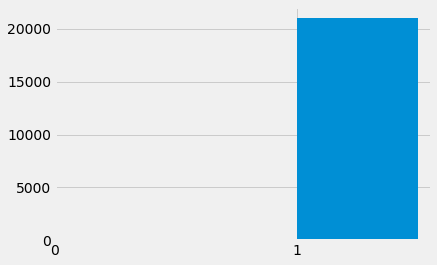

In [54]:
plt.hist(y_pred_ann0, bins=2)
plt.xticks(range(0, 2))
plt.show()

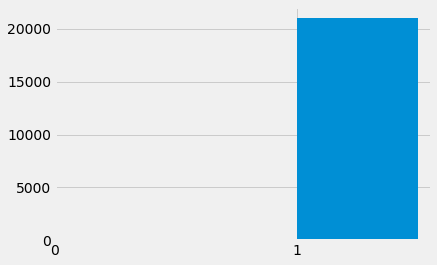

In [55]:
plt.hist(y_pred_ann1, bins=2)
plt.xticks(range(0, 2))
plt.show()

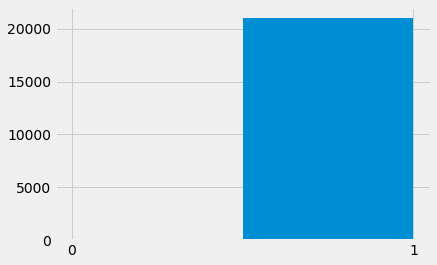

In [56]:
plt.hist(y_pred_ann2, bins=2)
plt.xticks(range(0, 2))
plt.show()

In [57]:
#Export the final CSV File
#Delete dummy row
df_test = df_test[:-1]
df_test.to_csv('/home/kebin/Syracuse/Syracuse/CIS600/HW4/outputKM.csv', float_format='%.2f', 
               columns=['ID', 'DT', 'ANN0', 'ANN1', 'ANN2'])

# 8. Conclusion <a class="anchor" id="Conclusion"></a>

Visually, we can see that the models predicting the outputs in roughly the same amounts: ~11,000 no's (or 0s) and ~9,000 yes's (or 1s). Given that the four models are around the same, low 70% accuracy, this all makes sense. However, the training data was much closer to a 50/50 split. Thus either the models' less than perfect accuracy is being observed, or the testing data actually has less patients with the disease. 

The best peforming model was the gradient boosting machine, which just edged out the random forest. Given that these were the two with the most hyper parameter tuning, that also makes sense. 

If I had to choose just one method for actual preditive purposes, I would use the gradient boosting machine, and run through more of the hyper parameter tests. I believe that extra tuning would improve accuracy, even if it was marginal. Fortunately, we also have the luxury of a baseline gradient boosting algorithim with XGBoost. While I wouldn't want to rely solely on a pre-tuned model, it is so quick and gives a good baseline.

In [58]:
table_data=[
    ['Naive Bayes', 'N/A', .713, .15],
    ['KNN - 16 Neighbors', 'Neighbors', .711, 29.9],
    ['Random Forest', 'max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators',.722, 5.52],
    ['Gradient Boosting - XGB', 'N/A', .72, 5.38],
    ['Decision Tree - Grid Search','n_components, criterion, max_depth', .718, 30],
    ['ANN0', 'Layers - 0', .726, 5.4],
    ['ANN1', 'Layers - 1',.727, 2.69],
    ['ANN2', 'Layers - 2', .724, 4.38],
]
df_table = pd.DataFrame(table_data)
# sort table in descending order by accuracy
df_table = df_table.sort_values(by=[2], kind="quicksort", ascending=False)
df_table[2] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[2]], index = df_table.index)
fig = go.Figure(data=[go.Table(header=dict(values=['Method','Hyperparameters', 'Accuracy', 'Time (seconds)']),
                 cells=dict(values=[df_table[0], df_table[1], df_table[2], df_table[3]]))
                     ])
fig.show()